In [1]:
library(circlize)
library(rtracklayer)
library(dplyr)
library(GenomicRanges)
library(ComplexHeatmap) ## legend

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, r

In [75]:
head(gene_gff3)

GRanges object with 6 ranges and 10 metadata columns:
      seqnames        ranges strand |   source     type     score     phase
         <Rle>     <IRanges>  <Rle> | <factor> <factor> <numeric> <integer>
  [1]    chrUn   40256-42129      + |      GAF     gene        NA      <NA>
  [2]    chrUn 261019-263210      - |      GAF     gene        NA      <NA>
  [3]    chrUn 262205-266549      + |      GAF     gene        NA      <NA>
  [4]    chrUn 266656-267240      + |      GAF     gene        NA      <NA>
  [5]    chrUn 267500-268043      + |      GAF     gene        NA      <NA>
  [6]    chrUn 268106-271419      - |      GAF     gene        NA      <NA>
             Name          ID transcripts    complete maxEvidence
      <character> <character> <character> <character> <character>
  [1]     HY00001  gene_25183           1           1           1
  [2]     HY00002  gene_27814           1           1           1
  [3]     HY00003  gene_25184           1           1           1
  [4]   

In [93]:
# Step 2: Read and Process GFF3 Data
# Replace 'gene_annotation.gff3' and 'te_annotation.gff3' with your file paths
gene_gff3 <- import("hap1_gemoma_final_annotation.gff") ## only gene rows, grep -v "^#" hap1_gemoma_final_annotation.gff > tmp
te_gff3 <- import("hap1.filteredRepeats.gff") ## sed -i '' 's/_RagTag//g' *.gff

# Filter for relevant feature types (e.g., "gene" and "transposable_element")
genes <- gene_gff3[gene_gff3$type == "gene"] 
tes <- te_gff3[te_gff3$type != "Simple_repeat"]

gene_bed0 <- genes %>%
  as.data.frame() %>%
  select(seqnames, start, end, strand, score = NULL, name = NULL) %>%
  mutate(score = ".", name = ".")
te_bed0 <- tes %>%
  as.data.frame() %>%
  select(seqnames, start, end, strand, score = NULL, name = NULL) %>%
  mutate(score = ".", name = ".")

# Rename columns to match BED format
colnames(gene_bed0) <- c("chrom", "chromStart", "chromEnd", "strand", "score", "name")
colnames(te_bed0) <- c("chrom", "chromStart", "chromEnd", "strand", "score", "name")

##remove chrUn
gene_bed <- gene_bed0 %>%
  filter(chrom != "chrUn")
te_bed <- te_bed0 %>%
  filter(chrom != "chrUn")


In [80]:
# Read the custom cytoband file
## bioawk -c fastx '{print $name"\t"1"\t"length($seq)}' hap1.fasta|sed "s/_RagTag//" > hap1.ideogram
custom_cytoband <- read.table("hap1.ideogram", header = FALSE, stringsAsFactors = FALSE)

# Rename columns for clarity
colnames(custom_cytoband) <- c("chr", "start", "end")
custom_cytoband

chr,start,end
<chr>,<int>,<int>
chr1,1,29230096
chr2,1,32432764
chr3,1,39685618
chr4,1,29536771
chr5,1,50348529
chr6,1,25597666
chr7,1,29801208
chr8,1,33751532
chr9,1,32741774


In [28]:
set.seed(123)
bed1 = generateRandomBed(nr = 100)
bed1 = bed1[sample(nrow(bed1), 20), ]
bed2 = generateRandomBed(nr = 100)
bed2 = bed2[sample(nrow(bed2), 20), ]

head(bed1)

,chr,start,end,value1
,<chr>,<int>,<int>,<dbl>
41,chr6,102324459,147617643,-0.5041883
89,chr17,65167455,77619820,-0.1026496
63,chr11,13366995,32331617,0.4248215
49,chr8,93343457,96256710,0.6562065
85,chr16,64403195,65047798,0.0496638
69,chr12,70708714,82785147,0.5841919


In [81]:
bed1 <- read.table("block_bed1", header = FALSE, stringsAsFactors = FALSE)
bed2 <- read.table("block_bed2", header = FALSE, stringsAsFactors = FALSE)
# Rename columns for clarity
colnames(bed1) <- c("chr", "start", "end")
colnames(bed1) <- c("chr", "start", "end")
head(bed1)

,chr,start,end
,<chr>,<int>,<int>
1,chr1,16366076,16823477
2,chr1,8568169,9235979
3,chr1,10914359,10937523
4,chr1,23423181,25355157
5,chr1,6942371,7606901
6,chr1,4539909,4726481


In [82]:
# Step 1: Get unique names and generate colors
unique_names <- unique(bed1$chr)
colors <- rainbow(length(unique_names))  # Generate colors

# Create a dictionary mapping names to colors
name_color_dict <- setNames(colors, unique_names)

# Step 2: Perform replacement and output color list
bed1$color <- name_color_dict[bed1$chr]  # Map names to colors
color_list <- bed1$color  # Output color list
head(bed1)

,chr,start,end,color
,<chr>,<int>,<int>,<chr>
1,chr1,16366076,16823477,#FF0000
2,chr1,8568169,9235979,#FF0000
3,chr1,10914359,10937523,#FF0000
4,chr1,23423181,25355157,#FF0000
5,chr1,6942371,7606901,#FF0000
6,chr1,4539909,4726481,#FF0000


In [83]:
nrow(bed1)

[1] 240

In [84]:
length(color_list)

[1] 240

In [58]:
png("circos_plot.png", width = 1000, height = 1000)
par(lwd = 3)
# Initialize the circos plot with the custom ideogram
circos.genomicInitialize(custom_cytoband, cex = 2)
circos.genomicAxis(labels.cex = 2) #https://github.com/jokergoo/circlize/issues/79

# Plot gene density
circos.genomicDensity(gene_bed, col = "blue", track.height = 0.1, window.size = 1e6)

# Plot te density
circos.genomicDensity(te_bed, col = "red", track.height = 0.1, window.size = 1e6)

# plot mcscan synteny
circos.genomicLink(bed1, bed2, col = color_list, border = NA)


## discrete legend
# lgd_points = Legend(at = c("gene", "TE"), type = "lines", 
#     legend_gp = gpar(col = 2:3), title_position = "topcenter", title = "Density")
# draw(lgd_points, x = unit(2, "mm"), y = unit(4, "mm"), 
#     just = c("right", "bottom"))

# Clear circos plot

circos.clear()
# Close the PNG device
dev.off()

pdf 
  2

In [107]:
head(custom_cytoband)

,chr,start,end
,<chr>,<int>,<int>
1,chr1,1,29230096
2,chr2,1,32432764
3,chr3,1,39685618
4,chr4,1,29536771
5,chr5,1,50348529
6,chr6,1,25597666


In [121]:
png("circos_plot_test.png", width = 1000, height = 1000)
# Initialize the circos plot with the custom ideogram
# Set the start angle
circos.par(start.degree = 90)
circos.initializeWithIdeogram(custom_cytoband, plotType = NULL)

circos.track(ylim = c(0, 1), track.height = 0.1, panel.fun = function(x, y) {
    breaks = seq(0, 1e9, by = 5e6)
    circos.genomicAxis(major.at = breaks, labels = paste0(breaks/1e6, ""), labels.cex = 1, tick.length = 0.01)
    circos.text(CELL_META$xcenter, CELL_META$ycenter, CELL_META$sector.index, cex=2)
})


# Plot gene density
circos.genomicDensity(gene_bed, col = "blue", track.height = 0.15, window.size = 1e6)

# Plot te density
circos.genomicDensity(te_bed, col = "red", track.height = 0.15, window.size = 1e6)

# plot mcscan synteny
circos.genomicLink(bed1, bed2, col = color_list, border = NA)

text(0, 0, "Hap1", cex = 2)

circos.clear()
# Close the PNG device
dev.off()

ERROR: Error in circos.axis(h = h, major.at = major.at, labels = major.tick.labels, : unused argument (tick.length = 0.01)


In [119]:
?circos.genomicAxis()

In [26]:
names(CELL_META)

[1] "xlim"                 "ylim"                 "xrange"              
 [4] "yrange"               "xcenter"              "ycenter"             
 [7] "cell.xlim"            "cell.ylim"            "sector.numeric.index"
[10] "sector.index"         "track.index"          "xplot"               
[13] "yplot"                "cell.width"           "cell.height"         
[16] "track.margin"         "cell.padding"         "cell.start.degree"   
[19] "cell.end.degree"      "cell.bottom.radius"   "cell.top.radius"     
[22] "bg.col"               "bg.border"            "bg.lty"              
[25] "bg.lwd"               "track.height"

In [106]:
names(CELL_META)

[1] "xlim"                 "ylim"                 "xrange"              
 [4] "yrange"               "xcenter"              "ycenter"             
 [7] "cell.xlim"            "cell.ylim"            "sector.numeric.index"
[10] "sector.index"         "track.index"          "xplot"               
[13] "yplot"                "cell.width"           "cell.height"         
[16] "track.margin"         "cell.padding"         "cell.start.degree"   
[19] "cell.end.degree"      "cell.bottom.radius"   "cell.top.radius"     
[22] "bg.col"               "bg.border"            "bg.lty"              
[25] "bg.lwd"               "track.height"

Please use in a form of `CELL_META$name` where `name` should be
supported in `get.cell.meta.data()`. Type `names(CELL_META)` for
supported names. 

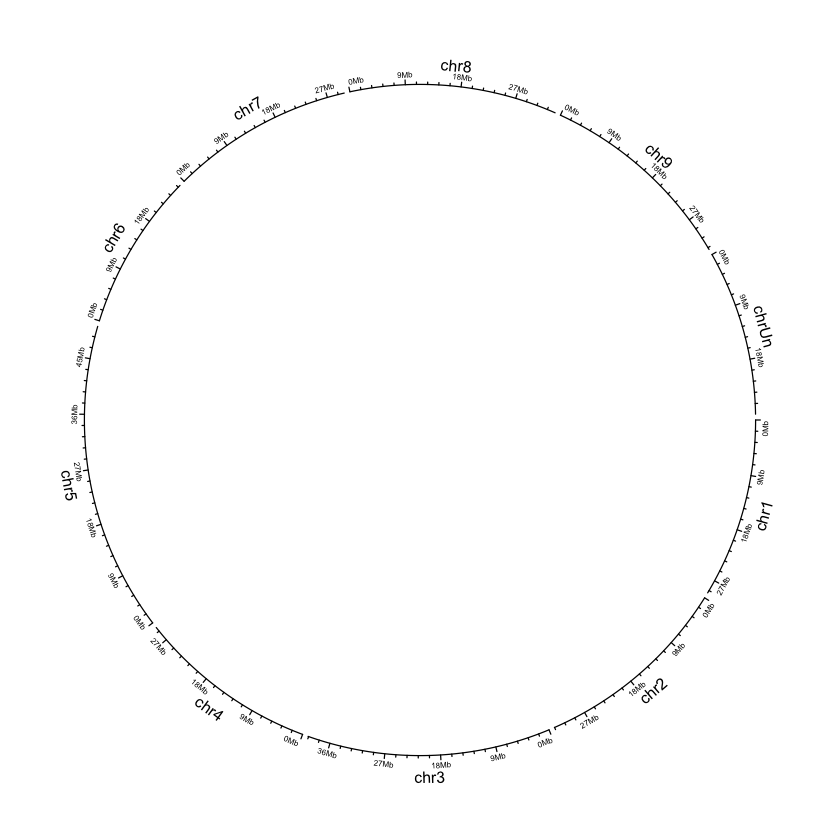

In [25]:
circos.genomicInitialize(custom_cytoband)
CELL_META

In [11]:
circos.par

 Option                  Value           
 -----------------------:------------------
 start.degree            0               
 gap.degree              1               
 gap.after               1               
 track.margin            0.01, 0.01      
 unit.circle.segments    500             
 cell.padding            0.02, 1, 0.02, 1
 track.height            0.2             
 points.overflow.warning TRUE            
 circle.margin           0, 0, 0, 0      
 canvas.xlim             -1, 1           
 canvas.ylim             -1, 1           
 major.by.degree         10              
 clock.wise              TRUE            
 xaxis.clock.wise        TRUE            
 message                 TRUE            
 help                    TRUE            